In [132]:
import json

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D      
from tqdm import tqdm

import mc_bfm_2d
from importlib import reload
reload(mc_bfm_2d)

%matplotlib inline

In [138]:
polymers = []
for j in range(20):
    monomers= [mc_bfm_2d.Monomer([1 + 2*j, 1 + 2*i]) for i in range(8)]
    for i in range(len(monomers)-1):
        mc_bfm_2d.Bond(monomers[i], monomers[i+1])
    polymers.append(mc_bfm_2d.Polymer(monomers))
    
occlusion = mc_bfm_2d.Occlusion(
    sorted(set(
        [(x, 0) for x in range(100)] + 
        [(x, 99) for x in range(100)] +
        [(0, y) for y in range(100)] +
        [(99, y) for y in range(100)] +
        [(x, 50) for x in range(45)] +
        [(x, 50) for x in range(55, 100)]
    ))
)
    
config = mc_bfm_2d.Configuration(100, 100, polymers, occlusions=[occlusion])

In [139]:

def plot_config(config):
    monomer_boxes = [Rectangle(monomer.lower_right_occupancy, 2, 2)
                     for polymer in config.polymers
                     for monomer in polymer.monomers]
    pc = PatchCollection(monomer_boxes, facecolor='blue', edgecolor='black')
    plt.gca().add_collection(pc)
    
    occlusion_boxes = [Rectangle(site, 1, 1)
                       for occlusion in config.occlusions
                       for site in occlusion.sites]
    pc = PatchCollection(occlusion_boxes, facecolor='grey', edgecolor='grey')
    plt.gca().add_collection(pc)

    bonds = {bond
             for polymer in config.polymers
             for monomer in polymer.monomers
             for bond in monomer.bonds}
    for bond in bonds:
        a = bond.a.lower_right_occupancy + np.array([1,1])
        b = bond.b.lower_right_occupancy + np.array([1,1])
        x, y = np.array([a,b]).T
        line = Line2D(x, y, color='red', linewidth=1)
        plt.gca().add_line(line)

    plt.xlim(0, config.width)
    plt.ylim(0, config.height)

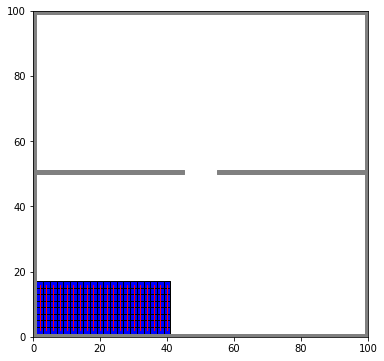

In [140]:
plt.figure(figsize=(6,6))

plot_config(config)

In [141]:
with open('config0.json', 'wt') as fp:
    fp.write(json.dumps(config.to_json()))

In [127]:
configs = []
with open('configs.json', 'rt') as fp:
    for line in fp:
        json_config = json.loads(line.strip())
        configs.append(mc_bfm_2d.Configuration.from_json(json_config))

1000it [15:09,  1.20it/s]


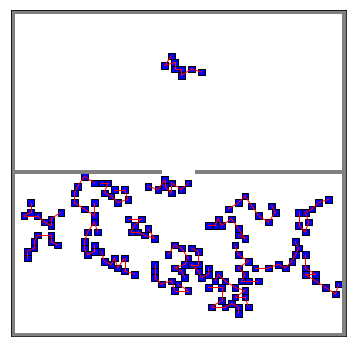

In [143]:
plt.figure(figsize=(6,6))

with tqdm() as t:
    with open('configs.json', 'rt') as fp:
        for i,line in enumerate(fp):
            json_config = json.loads(line.strip())
            config = mc_bfm_2d.Configuration.from_json(json_config)
            t.update()
            plt.clf()
            plot_config(config)
            plt.xticks([])
            plt.yticks([])
            plt.savefig('data/movie0/%05d.png' % i)